In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.display import HTML
from collections import deque
import importlib

%load_ext autoreload
%reload_ext autoreload

In [4]:
import simulation
import controller
from simulation import *
from main_bus import MainBus

In [5]:
importlib.reload(simulation)
importlib.reload(controller)

<module 'controller' from '/home/jgalle29/git/multi-agent-systems/Project/Python/controller.py'>

### Initialization

In [6]:
# Parameters

replay_length = 10000
iterations = 1440 # num of ticks per epoch
epochs = 10 # num of times network is unfrozen, trained
batch_size_ratio = 1.0 # num of samples from replay memory to train on
animate = False
add_arrivals_noise = False

# Model
loggers = []
simulation = Simulation(MainBus, loggers=loggers)
replay_memory = deque(maxlen = replay_length)
training_results = []
training_loss = []

Initializing Prob Dist


### Training

In [7]:
# Main training loop
epochs = 5
for epoch in range(epochs):
    print('Epoch #%d' % (epoch+1))
    
    simulation.reset(add_arrivals_noise) # resets everything
    
    training_results.append(simulation.execute(iterations=iterations)) # simulate and collect logs
    training_loss.append(simulation.controller.get_total_cost()) # collect loss

    replay_memory.extend(simulation.controller.replay_memory) # store data into replay memory
    
    # Get random samples
    training_idx = np.random.choice(len(replay_memory), size = np.int(len(replay_memory) * batch_size_ratio))
    training_samples = [replay_memory[i] for i in training_idx]

    # Train DQN
    simulation.controller.destination_model.train(training_samples)
    


Epoch #1
 1440 / 1440 (6720, 649) (6720,)


/home/jgalle29/.local/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
6720/6720 [==============================] - 0s - loss: 24113174.0000
Epoch #2
 1440 / 1440 (10000, 649) (10000,)
Epoch 1/1
10000/10000 [==============================] - 0s - loss: 7830343.0000
Epoch #3
 1440 / 1440 (10000, 649) (10000,)
Epoch 1/1
10000/10000 [==============================] - 0s - loss: 3487427.7500
Epoch #4
 1440 / 1440 (10000, 649) (10000,)
Epoch 1/1
10000/10000 [==============================] - 0s - loss: 420034.3438
Epoch #5
 1440 / 1440 (10000, 649) (10000,)
Epoch 1/1
10000/10000 [==============================] - 0s - loss: 1086848.1250


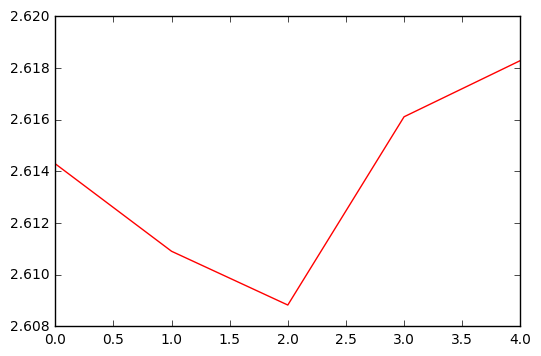

In [11]:
plt.plot(training_loss, 'r-')
plt.show()

In [14]:
simulation.controller.passengers_matrix.sum(axis=1)

array([ 1834.,  1818.,  1882.,  1859.,  1772.,  1886.,  1829.,  1834.,
        1793.,  1876.,  1825.,  1830.,  1837.,  1895.,  1903.,  1756.,
        1901.,  1826.,  1842.,  1781.,  1856.,  1889.,  1823.,  1893.])

In [13]:
simulation.controller.waiting_time_matrix

array([[  44910.,   19455.,    2895.,   50130.,   43920.,   18390.,
          10170.,   49845.,    9120.,   10875.,   63525.,   18900.,
          78555.,   83310.,  137235.,   66839.,   18885.,    1635.,
          41774.,   54360.,   27030.,   24780.,   25155.,   94665.],
       [  10755.,   28455.,    5235.,   77370.,   52320.,   84120.,
          23700.,  118215.,   15015.,    6045.,   93870.,  111495.,
          18435.,   72870.,   18825.,    8040.,  122265.,   13095.,
           4965.,   42840.,   23685.,   20580.,   10590.,   91725.],
       [  42405.,   23115.,    5295.,   85335.,   68670.,   34275.,
          36675.,   63419.,   23880.,    7680.,   67245.,   46530.,
          54615.,   67515.,   61710.,   49395.,   78254.,    8085.,
          69075.,   68985.,   15165.,   21030.,   18210.,   74040.],
       [  40590.,   29790.,    7530.,   90450.,   79500.,   39720.,
          31650.,   76200.,   22605.,    6510.,   72480.,   40455.,
          47250.,   67275.,   47220.,   57075

In [15]:

simulation.execute(iterations=2, animate=True)

{}

In [16]:
HTML(simulation.anim.to_html5_video())